In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
from dowker_homology import dowker_persistent_homology, plot_persistence
import matplotlib.pyplot as plt
%matplotlib notebook

In [14]:
# produce sphere
def sphere(npoints, r, sd):
    radius = np.random.normal(loc=r, scale=sd, size=npoints)
    theta = 2*np.pi*np.random.rand(npoints)
    phi = np.arccos(2*np.random.rand(npoints)-1)
    x = np.cos(theta) * np.sin(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(phi)

    return pd.DataFrame({'x' : radius * x, 
                        'y' : radius * y, 
                        'z' : radius * z})

In [15]:
coords = sphere(5000, 1, 0)

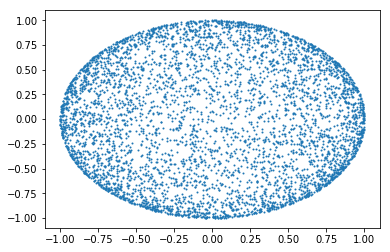

In [17]:
# plot sphere
fig, ax = plt.subplots()
ax.plot(coords['x'], coords['z'], marker="o",
        linestyle="", ms=1)
        
#ax.set_title('Sphere')

In [18]:
# choose parameters
n = len(coords)
interleaving = 3
dimension = 2

In [19]:
%%time 
homology_dowker, cover_radius_dowker, max_filtration_value_dowker = dowker_persistent_homology(
    coords.values, 
    n_samples=n, 
    interleaving=interleaving,
    dimension=dimension, 
    method="dowker",
    verbose=True)

Unreduced nerve has cardinality 26031261461250.0
Clique reduced nerve of cover has cardinality 3588846
Sparse nerve of cover has cardinality 332476
CPU times: user 6min 27s, sys: 5.5 s, total: 6min 32s
Wall time: 6min 32s


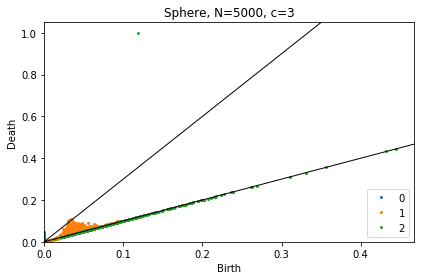

In [20]:
plot_dowker = plot_persistence(homology_dowker,
                               ticks=None, 
                               interleaving=interleaving,
                               cover_radius=cover_radius_dowker,
                               max_filtration_value=max_filtration_value_dowker,
                               title='Sphere, N=5000, c=3',
                               s=10)